# finding the con() and DFT


358801
358801


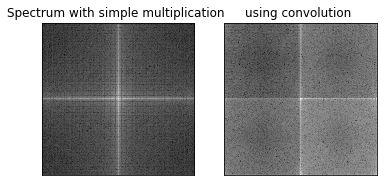

Duration: 0:00:02.989482


In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

from datetime import datetime
start_time = datetime.now()


imgF = cv2.imread('Brick-4.jpg',0)
#print("Before padding")
h_size = np.size(imgF)
#print(h_size)

imgH_con = cv2.imread('Bricks.jpg',0)
imgH= cv2.copyMakeBorder(imgH_con,0,299,0,299,cv2.BORDER_CONSTANT,value=0) #padding the image with smaller size

f_size = np.size(imgH)
#print(f_size,)
f_z_con= cv2.copyMakeBorder(imgF,0,50,0,50,cv2.BORDER_CONSTANT,value=0) #padding the image with smaller size
f_z= cv2.copyMakeBorder(f_z_con,0,299,0,299,cv2.BORDER_CONSTANT,value=0) #padding the image with smaller size


f_size = np.size(imgH)
#print(f_size)
h_size = np.size(f_z)
#print(h_size)

dftf_z = np.fft.fft2(f_z) #fast fourier transformation of f
dfth_z = np.fft.fft2(imgH)  #fast fourier transformation of h

dftf_z_con = np.fft.fft2(f_z_con) #fast fourier transformation of f
dfth_z_con = np.fft.fft2(imgH_con)

dft_final = dftf_z*dfth_z # multplying the fft of f and fft of h



fshift = np.fft.fftshift(dft_final) # shifting to center for f*h
final = 20*np.log(np.abs(fshift)) # log scaled  for f*h
print(np.size(final))

con = signal.fftconvolve(dfth_z_con,dftf_z_con,mode='full') # finding the cocolution for f and h
print(np.size(con))
fshift_con = np.fft.fftshift(con) # shifting to center for convolution
final_con = 20*np.log(np.abs(fshift_con)) # log scaled for convolution


plt.subplot(121),plt.imshow(final, cmap = 'gray')
plt.title('Spectrum with simple multiplication '), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(final_con, cmap = 'gray')
plt.title('using convolution '), plt.xticks([]), plt.yticks([])
plt.show()
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


# -----time taken by f*h , when we use convolution Theorem

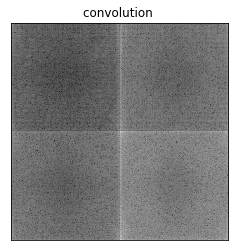

Duration: 0:00:00.305996


In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

from datetime import datetime
start_time = datetime.now()


imgF = cv2.imread('Brick-4.jpg',0)
imgH_con = cv2.imread('Bricks.jpg',0)


f_z_con= cv2.copyMakeBorder(imgF,0,50,0,50,cv2.BORDER_CONSTANT,value=0) #padding the image with smaller size

dftf_z_con = np.fft.fft2(f_z_con) #fast fourier transformation of f
dfth_z_con = np.fft.fft2(imgH_con)

con = signal.fftconvolve(dfth_z_con,dftf_z_con,mode='full') # finding the cocolution for f and h
#print(np.size(con))
fshift_con = np.fft.fftshift(con) # shifting to center for convolution
final_con = 20*np.log(np.abs(fshift_con)) # log scaled for convolution



plt.subplot(111),plt.imshow(final_con, cmap = 'gray')
plt.title('convolution '), plt.xticks([]), plt.yticks([])
plt.show()
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


# --- time when we Multiply two fft of the images and use padding


358801


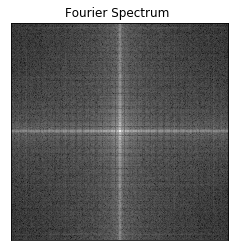

Duration: 0:00:00.299827


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

from datetime import datetime
start_time = datetime.now()


imgF = cv2.imread('Brick-4.jpg',0)



imgH_con = cv2.imread('Bricks.jpg',0)
imgH= cv2.copyMakeBorder(imgH_con,0,299,0,299,cv2.BORDER_CONSTANT,value=0) #padding the image with smaller size


f_z_con= cv2.copyMakeBorder(imgF,0,50,0,50,cv2.BORDER_CONSTANT,value=0) #padding the image with smaller size
f_z= cv2.copyMakeBorder(f_z_con,0,299,0,299,cv2.BORDER_CONSTANT,value=0) #padding the image with smaller size


dftf_z = np.fft.fft2(f_z) #fast fourier transformation of f
dfth_z = np.fft.fft2(imgH)  #fast fourier transformation of h



dft_final = dftf_z*dfth_z # multplying the fft of f and fft of h



fshift = np.fft.fftshift(dft_final) # shifting to center for f*h
final = 20*np.log(np.abs(fshift)) # log scaled  for f*h
print(np.size(final))




plt.subplot(111),plt.imshow(final, cmap = 'gray')
plt.title('Fourier Spectrum '), plt.xticks([]), plt.yticks([])

plt.show()
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
